### SVM
svm : 강력하고, 선형/비선형 분류/회귀/이상치 탐색에도 사용할 수 ㅇ -> 다목적 머신러닝 모델   
특히 복잡한 분류 문제에 잘 맞고, 작거나 중간 크기의 데이터셋에 적합   
로지스틱 회귀 분류기와 달리 클래스에 대한 확률은 제공 x (LinearSVC의 경우) (그냥 SVC모델은 probability=True로 지정하면, predict_proba 메서드를 제공) 
- 라지마진분류 : 클래스를 나눌 뿐만 아니라 가까운 훈련 샘플로부터 가능한 한 멀리 떨어지도록 결정경계를 구성(그래야 오분류확률 낮출 수 ㅇ)
- 서포트 벡터 : 경계에 가장 가까운 샘플 -> 이에 의해 전적으로 결정경계가 결정됨
- svm은 scale에 특히 민감함 -> 무조건 표준화 필요 (SVM은 클래스 사이에 가능한 한 가장 큰 도로를 내는 것으로 훈련 세트의 스케일이 맞지 않으면 크기가 작은 특성을 무시하는 경향ㅇ)   
   
도로의 폭을 가능한 넓게 유지함 vs 마진오류 사이의 균형이 필요 -> 소프트 마짐 분류 사용
- svm에서는 하이퍼파라미터 c를 이용해 균형을 조절 (c값 작아지면 : 도로의 폭 넓어지고, 마진오류도 커짐) -> 과대적합모델은 c를 감소시켜 규제가능

### 5.1 선형 SVM 분류

In [1]:
# 붓꽃데이터 적재, 특성 스케일 변경, Iris-Virginia 감지용 선형 svm 모델 훈련(C=1, 힌지손실함수 적용)

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"]==2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()), # 스케일링 후 
    ("linear_svc", LinearSVC(C=1, loss='hinge')) # 모델 적용하도록 파이프라인 구성
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
# 모델을 사용해 예측
svm_clf.predict([[5.5, 1.7]])

# 다른 방법 : SVC 모델의 사용 (ex) SVC(kernel='linear', C=1)) -> 큰 훈련셋에 대해서는 속도가 너무 느림
# 다른 방법2: SGDClassifier(loss='hinge', alpha=1/(m*C))와 같이 사용 -> 데이터셋 매우클때, 온라인학습으로 분류문제 다룰때 유용

array([1.])

### 5.2 비선형 SVM 분류

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=2000))])

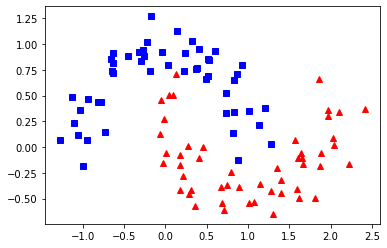

In [3]:
# PolynomialFeatures 변환기 + StandardScaler + LinearSVC를 연결해 구현

from sklearn.datasets import make_moons # 반달 모양 데이터셋을 만드는데에 사용되는 함수
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X, y = make_moons(n_samples = 100, noise=0.15, random_state=42) # 함수 이용해서 데이터 생성

plt.plot(X[y==0,0],X[y==0,1], 'sb') # 생성된 데이터 시각화 
plt.plot(X[y==1,0],X[y==1,1], '^r')

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),# 3차 항까지 생성
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge', max_iter=2000))
])

polynomial_svm_clf.fit(X,y)

In [4]:
# 5.2.1 다항식 커널
# 커널 트릭을 적용하면 '실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 ㅇ'
# SVC 파이썬 클래스에 구현되어있음

from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='poly', degree=3, coef0=1, C=5)) # coef0 : 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절
])

poly_kernel_svm_clf.fit(X,y)

# 적절한 하이퍼파라미터를 찾는 방법 -> 그리드서치

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [5]:
# 5.2.2 유사도 특성 추가
# 5.2.3 가우시안 RBF 커널 (rbf : 방사 기저 함수)
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma = 5, C=0.001))
])

# gamma : 규제 역할을 함 -> 값이 커지면 각 샘플의 영향 범위가 작아짐 -> 결정경계가 불규칙해지고, 샘플에 따라 휘어짐 (과대적합가능성 ㅇ)

rbf_kernel_svm_clf.fit(X,y)


# 다른 커널은 거의 사용되지 않음!
# 추가로 항상 선형 커널을 가장 먼저 시도해봐야함(LinearSVC를 사용하는 것이 SVC(kernel='linear'))보다 훨씬 빠름)
# 훈련 세트가 너무 크지 않은 경우 -> rbf커널을 시도

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

### 5.3 SVM 회귀

선형 비선형 회귀에도 사용가능하면 모델을 만드는 방식이 분류와 반대
- 분류 ) 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 한 최대가 되도록함
- 회귀 ) 제한된 마진 오류(도로 밖의 샘플) 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습

도로의 폭은 하이퍼파라미트 엡실론으로 조절함   
마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없음 -> epsilon-insensitive한 모델임   

SVR / LinearSVR에서의 하이퍼파라미터   
   - epsilon : 도로의 폭(마진)을 결정
   - tol : 허용오차

In [76]:
# 무작위 데이터 생성
np.random.seed(42)
m = 50
X = 2*np.random.rand(m,1) # (0,1)에서 균일하게 난수를 추출 m개를 생성하고, 1개씩 묶어줌
y =  (4 + 3*X + np.random.randn(m,1)).ravel() # .ravel(해줘야 위에서 1개씩 따로 묶어줬던게 y에서 필요한 한줄 꼴로 들어감)

# SVM 회귀의 적용 - Linear SVR사용
from sklearn.svm import LinearSVR


# epsilon-insensitivity를 확인하고자 모델을 두개 생성
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg1.fit(X_sc,y)

svm_reg2 = LinearSVR(epsilon=0.5, random_state=42) # 도로의 폭(마진)을 작게 설정
svm_reg2.fit(X_sc,y)

# 여기에 scaling이 어디에 있지..? : 이 경우 시각화를 위한걸로 fit과 predict data가 같기 때문에 문제 x (원래는 해줘야함)

LinearSVR(epsilon=0.5, random_state=42)

Text(0.5, 1.0, '$\\epsilon = 0.5$')

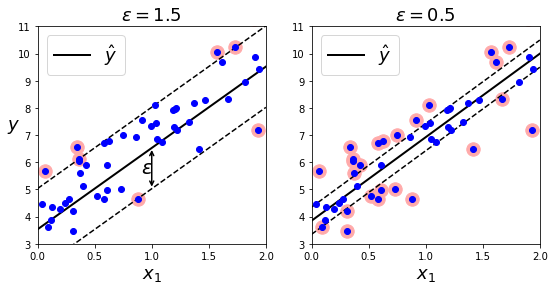

In [73]:
# 시각화 - 코드는 복붙

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X) # 실선으로 그리면 회귀 식이 되는것
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon) # 도로의 폭 밖에 있는 경우(거리가 도로의 폭보다 큰 경우)
    return np.argwhere(off_margin) # np.argwhere : 조건에 맞는 데이터의 위치를 찾는데 사용 (r에서는 which에 해당하는듯)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y) # 50개 데이터 중에 epsilon보다 회귀선에서의 거리가 먼 데이터
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1) # 시각화에 사용될 x grid
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$") # 'k-' : black line
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--") # 'k--' : black -- line
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA') # 저장해뒀던 도로폭 바깥의 값을 표시(분홍)
    plt.plot(X, y, "bo") # 'bo' : blue o shape
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

In [86]:
# 비선형 svm회귀 - 커널 svm 모델 사용
# 무작위 데이터 생성 
np.random.seed(42)
m = 100
X = 2*np.random.rand(m,1) - 1
y = (0.2 + 0.1*X + 0.5*X**2 + np.random.randn(m,1)/10).ravel()

# 모델 적합
from sklearn.svm import SVR # SVR은 커널 트릭을 제공! & 훈련 세트가 커지면 속도가 훨씬 느려짐

svm_poly_reg1 = SVR(kernel='poly', gamma='auto', degree=2, C=100, epsilon=0.1) # 규제가 적은 경우 (C : 규제의 정도에 반비례함)
svm_poly_reg1.fit(X,y)

svm_poly_reg2 = SVR(kernel='poly', gamma='auto', degree=2, C=0.01, epsilon=0.1)
svm_poly_reg2.fit(X,y)

SVR(C=0.01, degree=2, gamma='auto', kernel='poly')

Text(0.5, 1.0, '$degree=2, C=0.01, \\epsilon = 0.1$')

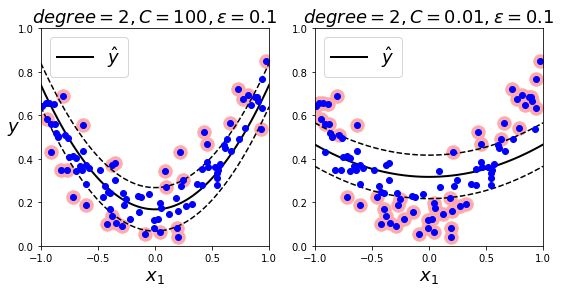

In [88]:
# 시각화 - 코드 복붙(위에서 만들어둔 함수 사용)

plt.figure(figsize=(9, 4))
plt.subplot(121) # = plt.subplot(1,2,1) : 한 행에 두개의 그래프 그리고 지금 지정하는 것은 그 중에 첫번째다.
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)


# 확실히 규제를 적게한 경우 많이 휘어지고 데이터에 많이 적합된 형태를 띔!!